Importing the Dependencies

In [48]:
import re
from math import ceil
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ishu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [5]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('train.csv')

In [6]:
news_dataset.shape

(20800, 5)

In [7]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [10]:
# merging the author name and news title
news_dataset['content'] = news_dataset['text']

In [11]:
print(news_dataset['content'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: content, Length: 20800, dtype: object


In [12]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [13]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [14]:
port_stem = PorterStemmer()

In [15]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [16]:
news_dataset['content'] = (news_dataset['title']+" "+news_dataset['author']).apply(stemming)

In [17]:
print(news_dataset['content'])

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object


In [18]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [19]:
print(X)

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu'
 'flynn hillari clinton big woman campu breitbart daniel j flynn'
 'truth might get fire consortiumnew com' ...
 'maci said receiv takeov approach hudson bay new york time michael j de la merc rachel abram'
 'nato russia hold parallel exercis balkan alex ansari'
 'keep f aliv david swanson']


In [20]:
print(Y)

[1 0 1 ... 0 1 1]


In [21]:
Y.shape

(20800,)

In [22]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [23]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [25]:
def roc(model):
    # calculate the false positive rate
    try:
        y_pred_proba = model.predict_proba(X_test)[::,1]
    except:
        y_pred_proba = model.predict_proba(X_test.toarray())[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()


In [74]:
def plot(models):
    # calculate the false positive rate
    plt.rcParams['legend.title_fontsize'] = 'xx-large'
    fig, axs = plt.subplots(ceil(len(models)/3), 3, figsize=(25,15))
    for i in range(ceil(len(models)/3)):
        for j in range(3):
            index = i*3+j
            if index > len(models)-1:
                break
            ax = axs[i, j]
            model = models[index]
            try:
                y_pred_proba = model.predict_proba(X_test)[::,1]
            except:
                y_pred_proba = model.predict_proba(X_test.toarray())[::,1]
            fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
            auc = metrics.roc_auc_score(Y_test, y_pred_proba)
            f1 = f1_score(Y_test, y_pred_proba.round())

            #create ROC curve
            ax.plot(fpr,tpr,label="AUC="+str(auc)+"\nF1="+str(f1))
            ax.set_title(model.__class__.__name__)
            ax.set_ylabel('True Positive Rate')
            ax.set_xlabel('False Positive Rate')
            ax.legend(loc=4)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.subplot_tool()            
    plt.show()
    return plt


In [91]:
def single_plot(models):
    # calculate the false positive rate
    for model in models:
        try:
            y_pred_proba = model.predict_proba(X_test)[::,1]
        except:
            y_pred_proba = model.predict_proba(X_test.toarray())[::,1]
        fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
        auc = metrics.roc_auc_score(Y_test, y_pred_proba)
        f1 = f1_score(Y_test, y_pred_proba.round())

        #create ROC curve
        plt.plot(fpr,tpr,label=f'{model.__class__.__name__}\nAUC={round(auc, 5)}\nF1={round(f1, 5)}')
        plt.legend(loc=4)
    #set the plot size and make lines thicker and labels bigger
    plt.rcParams['figure.figsize'] = [20, 15]
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    s.savefig('single_plot.png')
    plt.show()
    return plt


In [27]:
logistic_regression_model = LogisticRegression()

In [28]:
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression()

In [29]:
# accuracy score on the training data
X_train_prediction = logistic_regression_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [31]:
# accuracy score on the test data
X_test_prediction = logistic_regression_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


In [34]:
X_new = X_test[244]

prediction = logistic_regression_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [35]:
print(Y_test[3])

0


Naive Bayes:

Accuracy score of the test data :  0.8038461538461539


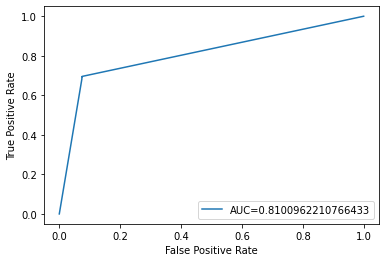

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train.toarray(), Y_train)
 
# making predictions on the testing set
y_pred = nb.predict(X_test.toarray())
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)
roc(nb)


KNN Classifier:

Accuracy score of the test data :  0.5100961538461538


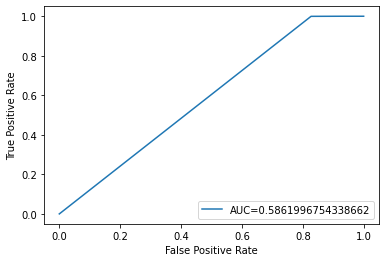

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)

# accuracy score on the test data
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)
roc(knn)

Decision Tree Classifier:

Accuracy score of the test data :  0.9507211538461539


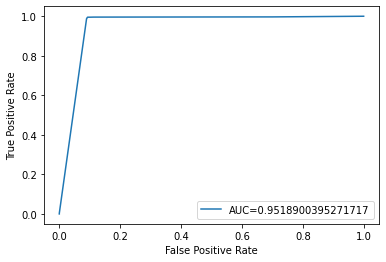

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)
dtree.fit(X_train,Y_train)

# accuracy score on the test data
X_test_prediction = dtree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)
roc(dtree)

Random Forest Classifier:

Accuracy score of the test data :  0.9478365384615385


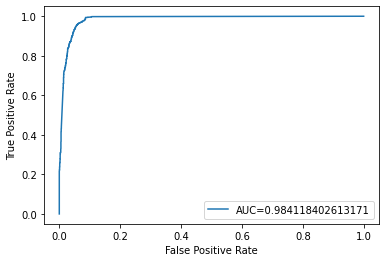

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(n_estimators=70,oob_score=True, n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)
rfm.fit(X_train,Y_train)
# accuracy score on the test data
X_test_prediction = rfm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)
roc(rfm)

SVM Classifier:

In [40]:
from sklearn import svm
svm=svm.SVC(kernel="linear",C=0.025,random_state=101, probability=True)
svm.fit(X_train,Y_train)
y_pred=svm.predict(X_test)

Accuracy score of the test data :  0.9206730769230769


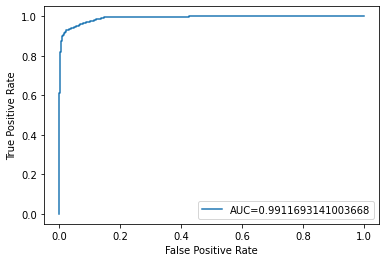

In [41]:
test_data_accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)
roc(svm)

In [42]:
#F1 plot
f1_score_ = f1_score(Y_test, y_pred, average='weighted')
print('F1 score of the test data : ', f1_score_)


F1 score of the test data :  0.9202156087618845


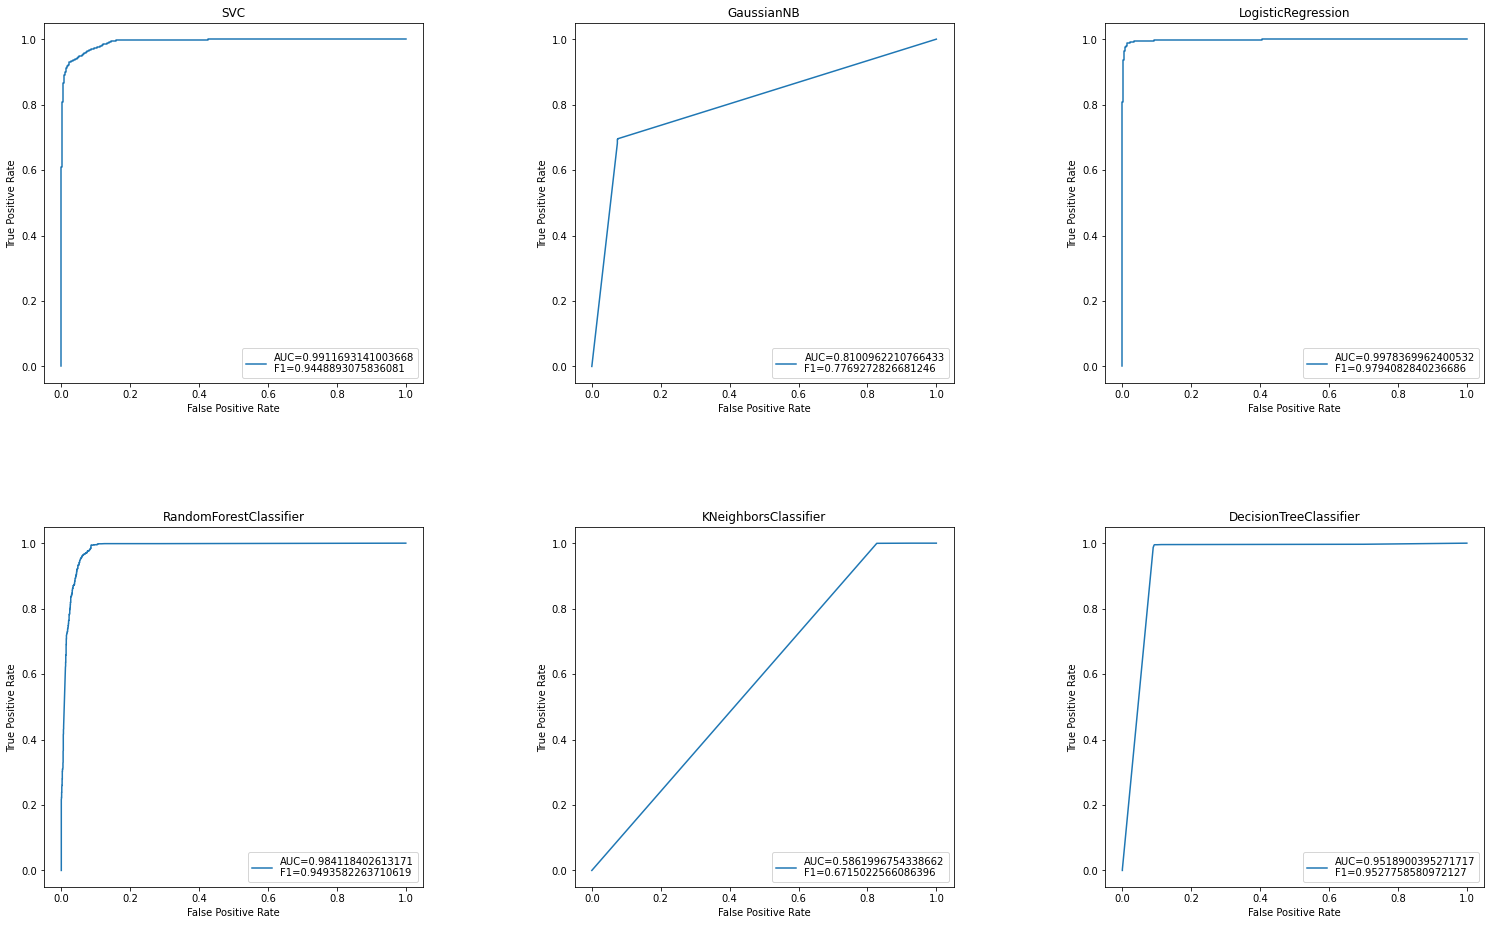

In [75]:
plots = plot([svm,nb,logistic_regression_model,rfm, knn, dtree])
plots.savefig('plots.png')

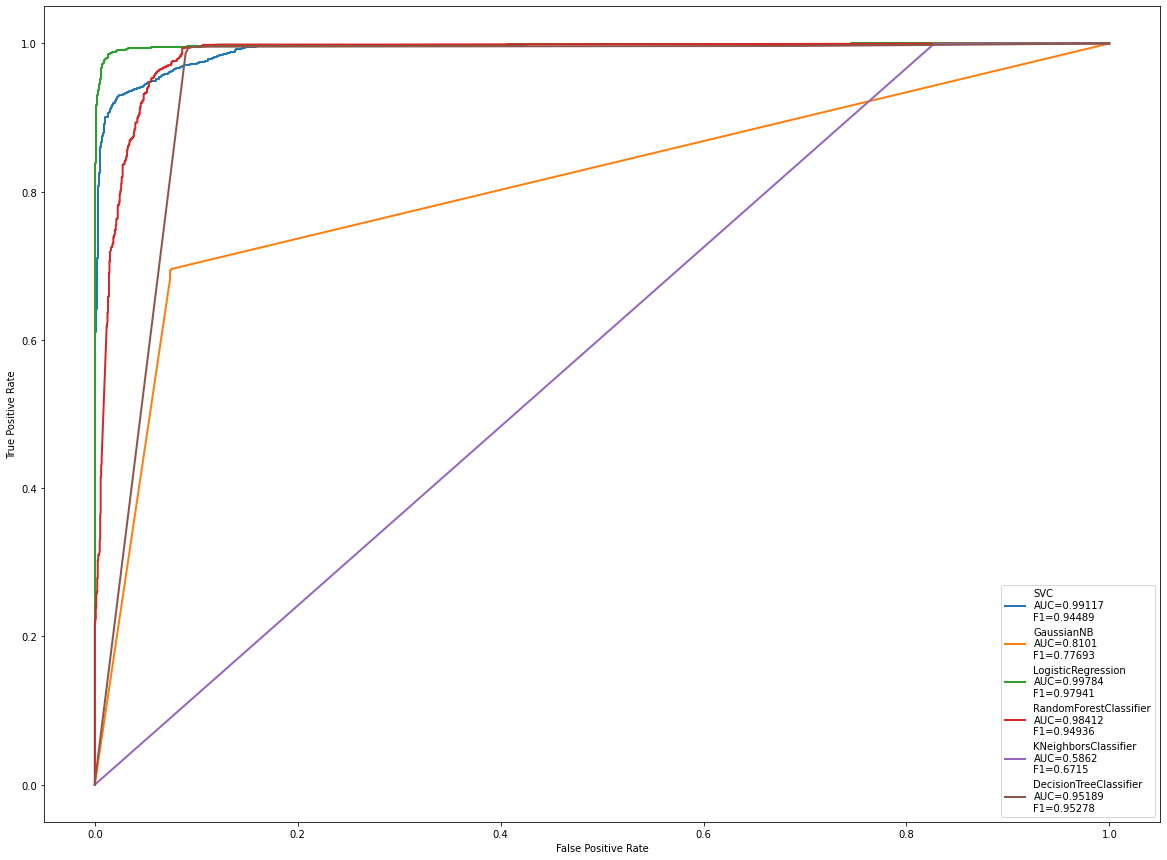

In [92]:
s = single_plot([svm,nb,logistic_regression_model,rfm, knn, dtree])

In [90]:
s.savefig('single_plot.png')

<Figure size 1440x1080 with 0 Axes>